In [22]:
import xarray as xr
import pathlib
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 

In [2]:
nc_path = pathlib.Path('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-analysis/SSM_model_output/')
nc_file = nc_path/'NPP_workshop120622_WQM.nc'

In [9]:
# Use shapefile with inlet attributions, provided by Stefano Mazzilli
shp_dir = pathlib.Path('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-grid/shapefiles/SSMGrid2_tce_ecy_node_info_v2_10102022_inlets')
shp = shp_dir/'SSMGrid2_tce_ecy_node_info_v2_10102022_inlets.shp'
gdf = gpd.read_file(shp)

In [4]:
ncdf = xr.open_dataset(nc_file)

In [30]:
ncdf.netPP.max()


<xarray.DataArray 'netPP' ()>
array(18.1163, dtype=float32)

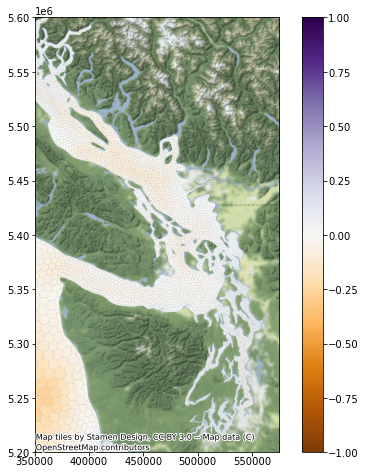

In [28]:
frame = "FullDomain"
gdf['NPP'] = ncdf.netPP[1000,:]
fig, axs = plt.subplots(1, figsize = (8,8))
if frame=="Region":
    gdf.loc[(gdf['Regions']==case.capitalize())].plot(
       ax=axs,
       column=model_var,
       scheme="User_Defined",
       legend=True,
       classification_kwds=dict(bins=upper_bounds[model_var]),
       cmap=mpl.colors.ListedColormap(color_list[model_var])
    )

else:
    gdf.plot(ax=axs,
       column='NPP', vmin=-1, vmax=1,
       legend=True, 
       cmap='PuOr'
    )
    # set graphic limits (these capture the range where DO_standard applies)
    axs.set_xlim(3.5e5,5.75e5)
    axs.set_ylim(5.2e6,5.6e6)
# set legend to lower left corner 
# (instead of default upper-right, which overlaps SOGNB)
# the legend for salinity and nitrogen doesn't have the 
# same attributes
# legend = axs.get_legend()
# legend._loc = 3 # lower-left

# remove x-, y-labels
# axs.set_xticklabels('')
# axs.set_yticklabels('')
# add background landscape
cx.add_basemap(axs, 
    crs=gdf.crs,
    source=cx.providers.Stamen.TerrainBackground,
    alpha=1
)
# axs.set_title(
#     f"{title_tag[model_var]}\n{model_date.month_name()} {model_date.day:02d}, 2014"
# )
# plt.savefig(output_file, bbox_inches='tight', format='png')
# plt.clf() #clear figure and memory